In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 3

In [2]:
def y(x):
    return x**2

def d(x):
    return 2*x

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [3]:
def gradient_descent(x_init, learning_rate):
    iter = 0
    x = np.linspace(-2, 2, 100)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10,5])
    ax1.plot(x,y(x))
    list_x = []
    while True:
        x_init = x_init - learning_rate * d(x_init)
        iter += 1
        list_x.append(y(x_init))
        ax1.scatter(x_init, y(x_init))
        if abs(learning_rate * d(x_init)) < 10**(-4) or iter == 100:
            print(x_init)
            ax2.plot(list_x)
            ax1.title.set_text('Gradient descent')
            ax2.title.set_text('Loss')
            break

0.00020311991333683184


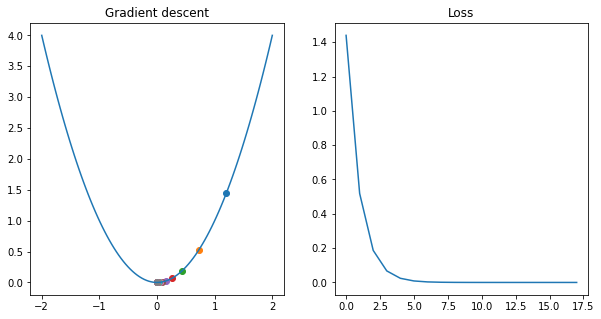

In [4]:
gradient_descent(2,0.2)

2


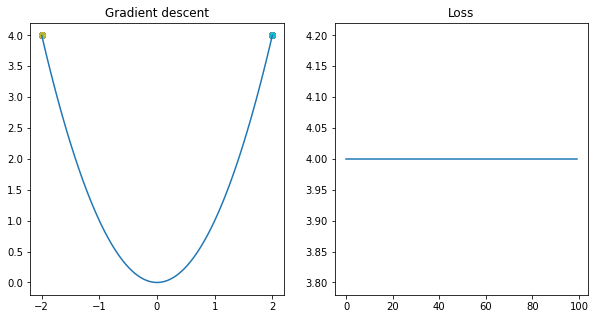

In [5]:
gradient_descent(2,1)

1030755041464022662072922259531242545404215044002


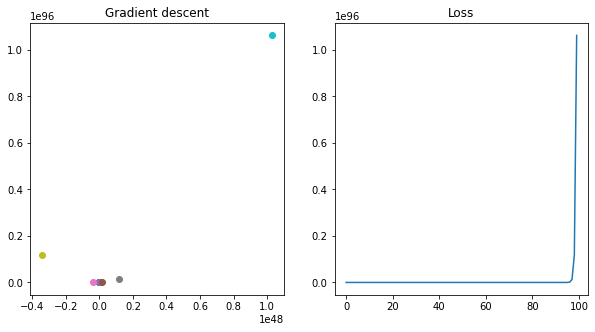

In [6]:
gradient_descent(2,2)

# Exercise 4

In [7]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Machine Learning/data/'
dataset = pd.read_csv(path + 'dataset.csv')
dataset.rename(columns = {'Lương':'x1', 'Thời gian làm việc':'x2', 'Cho vay':'t'}, inplace=True)
dataset.head()

,x1,x2,t
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [8]:
class LogisticRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target
        self.t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        self.feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        self.x = np.concatenate((np.ones((self.df.shape[0], 1)), self.feature), axis= 1)

    def find_coefficient(self, w=np.ones((dataset.shape[1],1)), learning_rate=0.02):
        iter = 0
        while True:
            w = w - learning_rate * np.dot(self.x.T, (sigmoid(np.dot(self.x,w)) - self.t))
            iter += 1
            if np.all(learning_rate * np.dot(self.x.T, (sigmoid(np.dot(self.x,w)) - self.t))) < 10**(-4) or iter == 500:
                return w

    def find_class(self):
        w = self.find_coefficient()
        return sigmoid(np.dot(self.x,w)) >=  0.5

    def predict(self, value):
        w = self.find_coefficient()
        x = np.concatenate((np.ones((value.shape[0], 1)), value), axis= 1)
        return sigmoid(np.dot(x,w)) >= 0.5

In [9]:
logis = LogisticRegression(dataset,'t')
print(logis.find_coefficient())
logis.find_class()

[[-7.81780697]
 [ 0.68483892]
 [ 3.90509942]]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

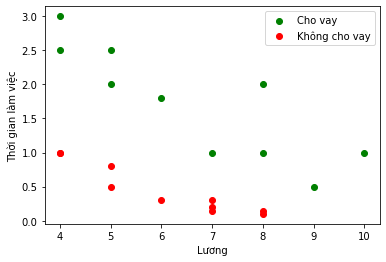

In [10]:
plt.scatter(dataset[dataset.t == 1].x1, dataset[dataset.t == 1].x2, c='g', label='Cho vay')
plt.scatter(dataset[dataset.t == 0].x1, dataset[dataset.t == 0].x2, c='r', label='Không cho vay')
plt.xlabel('Lương')
plt.ylabel('Thời gian làm việc')
plt.legend()

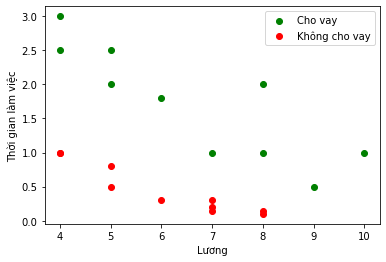

In [16]:
plt.scatter(dataset[logis.find_class() == 1].x1, dataset[logis.find_class() == 1].x2, c='g', label='Cho vay')
plt.scatter(dataset[logis.find_class() == 0].x1, dataset[logis.find_class() == 0].x2, c='r', label='Không cho vay')
plt.xlabel('Lương')
plt.ylabel('Thời gian làm việc')
plt.legend()

In [17]:
new_value = np.array([[2,3],
                [1,8],
                [5,5]])
logis.predict(new_value)

array([[ True],
       [ True],
       [ True]])